In [2]:

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [3]:
data = pd.read_csv("Algerian_forest_fires_cleaned.csv")
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


Checking for null values

In [4]:
data.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [5]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


Defining classes

In [6]:
data['Classes']=np.where(data['Classes'].str.contains('not fire'),0,1)


Dropping unwanted columns

In [7]:
data.drop(columns=['day','month','year'], inplace=True)
print(data)

     Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  Classes  \
0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5        0   
1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4        0   
2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1        0   
3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0        0   
4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5        0   
..           ...  ..  ..   ...   ...   ...   ...  ...   ...  ...      ...   
238           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5        1   
239           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0        0   
240           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2        0   
241           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7        0   
242           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5        0   

     Region  
0         0  
1         0  
2         0  
3         0  
4    

Finding correlation

<Axes: >

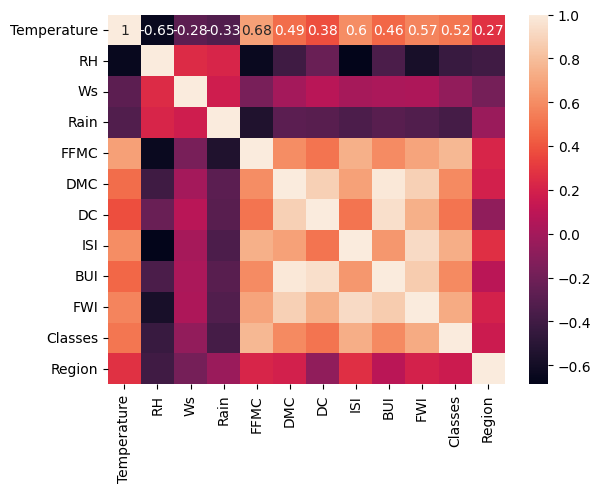

In [8]:
sns.heatmap(data.corr(), annot=True)

Splitting Independent and dependent variables

In [9]:
X=data.drop(["FWI","Region"], axis=1)
y= data['FWI']

In [10]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0
...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0


In [11]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

Splitting training and testing data

In [12]:
# ! pip install -U scikit-learn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

Standarizing data

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [14]:
X_train_sc = scaler.fit_transform(X_train)

X_train_sc

array([[-1.12656349,  1.2199876 , -0.22762867, ..., -0.11433646,
        -0.20093835,  0.90566259],
       [ 0.52256258,  0.1473255 , -0.98795537, ...,  0.09352209,
        -0.38763567,  0.90566259],
       [ 0.24770824,  0.34844965, -0.22762867, ...,  0.09352209,
         0.43916677,  0.90566259],
       ...,
       [-1.95112653,  0.88478069,  0.53269803, ..., -1.06124763,
        -1.03440854, -1.10416397],
       [ 0.52256258, -0.25492278,  0.15253468, ...,  0.60162077,
         0.14578526,  0.90566259],
       [-0.5768548 ,  0.95182207,  2.05335143, ..., -0.85338908,
        -0.99440197, -1.10416397]])

In [15]:
X_test_sc = scaler.transform(X_test)
X_test_sc

array([[-3.02000454e-01,  8.02841227e-02, -2.27628673e-01,
        -3.84476576e-01,  6.43451873e-01, -7.48542807e-02,
         2.55829244e-01,  2.08999063e-01,  6.57721173e-02,
         9.05662586e-01],
       [ 2.47708237e-01, -5.90129685e-01, -9.87955373e-01,
        -3.84476576e-01,  7.49493788e-01, -4.04459160e-01,
        -4.13146248e-01,  3.70666824e-01, -4.27642239e-01,
         9.05662586e-01],
       [-1.12656349e+00, -3.21964162e-01,  9.12861378e-01,
         6.02042154e-01, -9.82524172e-01, -9.18029554e-01,
        -8.55112039e-01, -8.30293687e-01, -9.34392119e-01,
        -1.10416397e+00],
       [ 5.22562583e-01, -3.21964162e-01, -9.87955373e-01,
        -2.94793055e-01,  1.34450676e-01,  2.70081058e-01,
         7.41991614e-01, -6.22435137e-01,  4.72505573e-01,
        -1.10416397e+00],
       [-5.76854799e-01,  1.47325503e-01, -6.07792023e-01,
        -3.84476576e-01,  5.51548879e-01,  6.31198549e-02,
        -1.31895290e-01, -6.81456700e-02, -2.75765448e-02,
         9.

Training model using Linear regression

In [16]:
from sklearn.linear_model import LinearRegression
Reg= LinearRegression()

In [17]:
Reg.fit(X_train_sc, y_train)

LinearRegression()

Finding intercept

In [18]:
Reg.intercept_


7.221604938271603

Finding the coefficients

In [19]:
Reg.coef_

array([-6.46502556e-02, -1.42831089e-01, -6.76458107e-02,  9.20371901e-04,
       -8.48817522e-01, -4.01628643e-01, -7.30568322e-01,  5.03984513e+00,
        4.86031145e+00,  2.75179828e-01])

In [20]:
y_predict=Reg.predict(X_test_sc)

Values for MAE, MSE, and R2

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("MAE:", mean_absolute_error(y_test,y_predict))
print("MSE:", mean_squared_error(y_test,y_predict))
print("r2 score:", r2_score(y_test,y_predict))

MAE: 0.47252520347083427
MSE: 0.4536563790985542
r2 score: 0.9896803298781217


Value for R2 adjusted

In [22]:
score = r2_score(y_test, y_predict)
r2_adjusted= 1-((1-score)*(len(y)-1))/ (len(y)-X.shape[1]-1)

r2_adjusted


0.9892355165107993

In [23]:
import pickle

In [24]:
pickle.dump(scaler,open("scaler_InClass.pk1",'wb'))
pickle.dump(Reg,open("regressor_InClass.pk1",'wb'))

In [25]:
model_regressor =pickle.load(open("regressor_InClass.pk1",'rb'))
model_scaler =pickle.load(open("scaler_InClass.pk1",'rb'))

In [26]:
X_new = pd.DataFrame({'Temperature':[27,29,30,34,35],
                     'RH':[54,51,26,86,7],
                     'Ws':[22,13, 16, 18,20],
                     'Rain':[1,5.58,6.7,15,8],
                     'FFMC':[28, 35.5,45.5,78.5,88.6],
                     'DMC':[0.7,65,7.8,8.9,35.4],
                     'DC':[6.9,88.5,220,100,68],
                     'ISI':[1.5, 1.7, 2.5, 2.9,1.6 ], 
                     'BUI':[37.856,35.889, 37.4, 37.56 , 36],
                     'Classes':[0,1,1,1,0]})

In [27]:
X_new_sc=model_scaler.transform(X_new)

In [28]:
y_new_predict=model_regressor.predict(X_new_sc)
y_new_predict

array([13.82009681, 10.56783802, 11.36452301, 10.93545101,  8.09580986])